# Python Microservice Demo

## What is a microservice?
A microservice is a small, independently deployable software unit that focuses on doing one task well, as part of a larger distributed system. It communicates with other microservices through well-defined APIs.

## What is an API?
An API (Application Programming Interface) is a set of rules, protocols, and tools for building software applications. It specifies how software components should interact, allowing different systems to communicate with each other.

## What is FastAPI?
FastAPI is a modern, fast (high-performance) web framework for building APIs with based on standard Python type hints. It's known for its speed, ease of use, and automatic generation of interactive API documentation.


## What will we be building?
1. Demonstrate how to recreate the Flask application from the last workshop.
2. An API endpoint that can return a list of users.
3. An API endpoint that can return images of coffee.
4. Create a homepage.

## First Steps: Create a New Python Environment
This way it does not interfere with your current Python libraries or packages.

### Create a new virtual environment

```sh
python -m venv env
```
or if the above doesn't work: 
```sh
python3 -m venv env
```

### Activate the environment (Linux / Mac)

```sh
source python -m venv env
```

### Activate the environment (Windows)

```sh
.\env\Scripts\activate
```

## Install the necessary libraries

```sh
pip install -r requirements.txt
```
or if your pip program is named differently:
```sh
pip3 install -r requirements.txt
```

### Import FastAPI and the `users_list` from *users.py*

In [1]:
from fastapi import FastAPI
from users import users_list

app = FastAPI(title="Demo Microservice w/ FastAPI")

### 1. Recreating the Hello World Application

In [7]:
@app.get("/")
def get_root():
    return {"Hello":"World"}

### Now start the server!

In [6]:
%run -m uvicorn exercise1:app --port 8000 --reload

INFO:     Will watch for changes in these directories: ['/home/developer/git/microservice-demo']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [72120] using WatchFiles
INFO:     Started server process [72268]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


INFO:     127.0.0.1:49780 - "GET / HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [72268]
INFO:     Stopping reloader process [72120]


`%run` is a special Jupyter only command that allows you to run Python modules. You can also run this in terminal with
```sh
uvicorn exercise1:app --port 8000 --reload
```

To stop the cell, press the square button to the left:

 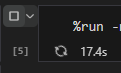

### To test your API, go to your browser and type:
`localhost:8000`

or in your terminal (Mac, Linux, or Windows), type
```sh
curl localhost:8000
```

### NOTE! If you ran your server in this notebook, you will have to stop it to run other cells.
If you run the notebook in terminal, all your changes made will be reloaded, hence the `--reload` parameter.

### 2. Create endpoint for getting users

In [8]:
# Get all users
@app.get("/users")
def get_all_users():
    return users_list

# Get a users age
@app.get("/users/{name}")
def get_all_users(name: str):
    user = users_list[name]
    if user is None:
        return {"error": "User does not exist!"}
    return user


### Now run your code again...
Either by using the cell below, or if you ran using the terminal, you won't have to do anything! 
You would just have to save the file and it will automatically update the server.

### 3. (More Advanced) Return Random Images of Coffee
What this does is takes a publically available API that generates random images of coffee and then mimicks the operation on our endpoint.

There are two ways of doing this:
1. Downloading the image from the site and sending it back with an `FileResponse()` type
2. streaming it directly from the website without having to download it. Streaming it is a bit more difficult.

We picked #2 so we don't have to store the files on our computer.

In [ ]:
from fastapi import HTTPException
from fastapi.responses import StreamingResponse
import httpx

@app.get("/coffee")
async def get_coffee():
    async with httpx.AsyncClient() as client:
        coffee_api = "https://coffee.alexflipnote.dev/random"
        try:
            # Fetching the image from the URL
            response = await client.get(coffee_api)
            response.raise_for_status()  # Raises an exception for 4XX/5XX responses
        except httpx.RequestError as exc:
            raise HTTPException(status_code=400, detail=f"Request error: {exc}") from exc
        except httpx.HTTPStatusError as exc:
            raise HTTPException(status_code=exc.response.status_code, detail=f"HTTP error: {exc}") from exc

        # Stream the response back
        return StreamingResponse(response.iter_bytes(), media_type=response.headers['Content-Type'])

### 4. Create a webpage using HTML in FastAPI!

We need to import one more FastAPI response type... it's HTMLResponse.

This tells the server what we will return is going to be a webpage/HTML.

In [ ]:
# Create a simple webpage
@app.get("/home")
async def get_homepage():
    page = \
        """
            <script>
                function btn_click() {
                    alert('You clicked this button');
                }
            </script>

            <html style="background-color: blue;">
                <center>
                    <h1>Welcome to my webpage!!</h1>
                    <button id='btn' onclick='btn_click();'>Click me</button>
                </center>
            </html>
        """
    return HTMLResponse(content=page)

### Now go to your website in the browser: 

`localhost:8000/home`

## That's it! You've completed this workshop. 
#### The `main.py` file has all the code already written correctly. 
You can play around with this code further.

Don't forget to quit your server by pressing 
`ctrl + c`
